In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from IPython.display import clear_output

In [2]:

data = pd.read_csv('../data/data_v3.csv')
data.head()

,id,date,photo,width,height,text,text_entities,raw_text,type,ocr_res,full_text,description
0,1567,2022-01-02T13:46:28,photos/photo_1205@02-01-2022_13-46-28.jpg,800.0,419.0,"['Job Title:', {'type': 'hashtag', 'text': '#s...","[{'type': 'plain', 'text': 'Job Title:'}, {'ty...",Job Title:#senior and a junior #developer\n \n...,job_post,We are on the hunt for a JUNIOR/SENIOR Develop...,Job Title:#senior and a junior #developer\n \n...,\nJob Title: Junior/Senior Developer\nCompany ...
1,1568,2022-01-03T11:09:36,photos/photo_1206@03-01-2022_11-09-36.jpg,1110.0,1124.0,"['Job Title:', {'type': 'hashtag', 'text': '#c...","[{'type': 'plain', 'text': 'Job Title:'}, {'ty...",Job Title:#cashier\nJob Type: #full_time\n \nش...,job_post,Jolgi Job Type:Full Time Send your CV to m.jaw...,Job Title:#cashier\nJob Type: #full_time\n \nش...,\nJob Title: Cashier\nCompany Name: Euroline-R...
2,1569,2022-01-03T14:28:11,photos/photo_1207@03-01-2022_14-28-11.jpg,1280.0,1267.0,"['Company: ', {'type': 'hashtag', 'text': '#Na...","[{'type': 'plain', 'text': 'Company: '}, {'typ...",Company: #National_Technology_Group #NTG)\nJob...,job_post,JOIN OURTEAM We're Hiring. NET DEVELOPER +lyea...,Company: #National_Technology_Group #NTG)\nJob...,\nJob title: .NET Developer\nCompany Name: Nat...
3,1570,2022-01-03T17:12:13,photos/photo_1208@03-01-2022_17-12-13.jpg,1014.0,1124.0,"['Job title: ', {'type': 'hashtag', 'text': '#...","[{'type': 'plain', 'text': 'Job title: '}, {'t...",Job title: #Employees for Operations Departmen...,job_post,Job Vacancy Employees for Operations Departmen...,Job title: #Employees for Operations Departmen...,\nCompany Name: None\nSalary: None\nYears of E...
4,1571,2022-01-03T19:16:11,photos/photo_1209@03-01-2022_19-16-11.jpg,1062.0,1125.0,"[{'type': 'link', 'text': 'https://www.faceboo...","[{'type': 'link', 'text': 'https://www.faceboo...",https://www.facebook.com/384708578676644/posts...,link,Jmloi AWASOL Developer Remotely Send your CV t...,https://www.facebook.com/384708578676644/posts...,\nJob Title: AWASOL Developer \nCompany Name: ...


In [3]:
data.loc[data.full_text == '\n' , 'description'] = np.nan

Job Post:
 https://www.facebook.com/384708578676644/posts/1277077906106369/
WEARE HIRING Flutter Developer Flutter Contact Us by WhatsApp: 0969699911 0992081792 Jolg
----------------------------------------
ChatGPT res: 
Job Title: Flutter Developer
Company Name: None
Salary: None
Location: None
Job Type: None
Years of Experience: None
Required Skills: Flutter


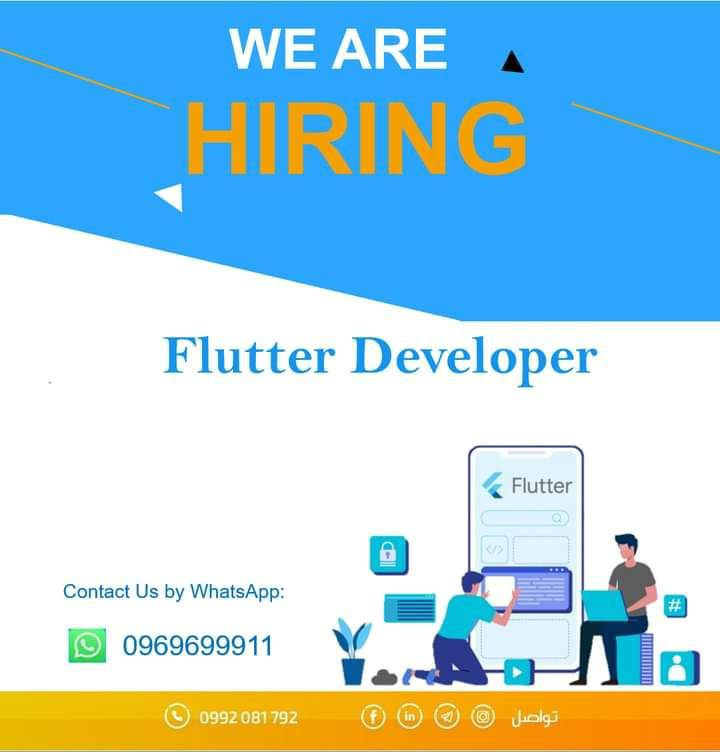

In [4]:
# checking random records to validate chatGPT responess

rand = np.random.randint(0,data.shape[0])
print(f'Job Post:\n {data.iloc[rand].full_text}')
print('-'*40)
print(f'ChatGPT res: {data.iloc[rand].description}')
display(Image.open("../data/"+data.iloc[rand].photo))

as we can see, ChatGPT responses are not very accurate, and not consistent, some of the required skills are not truly a skill, otherwise, it may be a hashtag or another arbitrary keyword, also, OCR results are not that accurate, so the responses need to be cleaned.

# Extract Job Details
The next step is to extract and seperate info from chatgpt responses, we will create the following columns:
- job_title
- company_name
- salary
- location
- job_type
- years_of_experience
- skills

In [5]:
job_desc = []
for desc in data.description:

    if desc is np.nan:
        job_desc.append(temp_dict)
        continue

    temp_dict = {
        "job_title": np.nan,
        "company_name": np.nan,
        "salary": np.nan,
        "location": np.nan,
        "job_type": np.nan,
        "years_of_experience": np.nan,
        "skills": np.nan,
    }

    info = desc.split("\n")
    for line in info:
        line = line.lower().replace("#", "").replace("_", " ")
        if "job title:" in line:
            temp_dict["job_title"] = line[line.find(":") + 1 :].strip().lower()
        elif "company name:" in line:
            temp_dict["company_name"] = line[line.find(":") + 1 :].strip().lower()
        elif "salary:" in line:
            temp_dict["salary"] = line[line.find(":") + 1 :].strip().lower()
        elif "location:" in line:
            temp_dict["location"] = line[line.find(":") + 1 :].strip().lower()
        elif "job type:" in line:
            temp_dict["job_type"] = line[line.find(":") + 1 :].strip().lower()
        elif "years of experience:" in line:
            temp_dict["years_of_experience"] = (
                line[line.find(":") + 1 :].strip().lower()
            )
        elif "required skills:" in line:
            temp_dict["skills"] = line[line.find(":") + 1 :].strip().lower()

    job_desc.append(temp_dict)


In [6]:
job_description = pd.DataFrame(job_desc)

In [7]:
job_description.isna().sum()

job_title              30
company_name           49
salary                  0
location               15
job_type               19
years_of_experience     1
skills                  1
dtype: int64

In [8]:
data = pd.concat([data,job_description], axis=1)

In [9]:
data.head()

,id,date,photo,width,height,text,text_entities,raw_text,type,ocr_res,full_text,description,job_title,company_name,salary,location,job_type,years_of_experience,skills
0,1567,2022-01-02T13:46:28,photos/photo_1205@02-01-2022_13-46-28.jpg,800.0,419.0,"['Job Title:', {'type': 'hashtag', 'text': '#s...","[{'type': 'plain', 'text': 'Job Title:'}, {'ty...",Job Title:#senior and a junior #developer\n \n...,job_post,We are on the hunt for a JUNIOR/SENIOR Develop...,Job Title:#senior and a junior #developer\n \n...,\nJob Title: Junior/Senior Developer\nCompany ...,junior/senior developer,none,none,none,full-time,extensive,"php, laravel, sql, javascript, html5, css, boo..."
1,1568,2022-01-03T11:09:36,photos/photo_1206@03-01-2022_11-09-36.jpg,1110.0,1124.0,"['Job Title:', {'type': 'hashtag', 'text': '#c...","[{'type': 'plain', 'text': 'Job Title:'}, {'ty...",Job Title:#cashier\nJob Type: #full_time\n \nش...,job_post,Jolgi Job Type:Full Time Send your CV to m.jaw...,Job Title:#cashier\nJob Type: #full_time\n \nش...,\nJob Title: Cashier\nCompany Name: Euroline-R...,cashier,euroline-rent,none,damascus,full time,3,"english language, jobseekers, jobseeker, inter..."
2,1569,2022-01-03T14:28:11,photos/photo_1207@03-01-2022_14-28-11.jpg,1280.0,1267.0,"['Company: ', {'type': 'hashtag', 'text': '#Na...","[{'type': 'plain', 'text': 'Company: '}, {'typ...",Company: #National_Technology_Group #NTG)\nJob...,job_post,JOIN OURTEAM We're Hiring. NET DEVELOPER +lyea...,Company: #National_Technology_Group #NTG)\nJob...,\nJob title: .NET Developer\nCompany Name: Nat...,.net developer,national technology group (ntg),none,damascus,full time onsite,1,"asp core, reactjs"
3,1570,2022-01-03T17:12:13,photos/photo_1208@03-01-2022_17-12-13.jpg,1014.0,1124.0,"['Job title: ', {'type': 'hashtag', 'text': '#...","[{'type': 'plain', 'text': 'Job title: '}, {'t...",Job title: #Employees for Operations Departmen...,job_post,Job Vacancy Employees for Operations Departmen...,Job title: #Employees for Operations Departmen...,\nCompany Name: None\nSalary: None\nYears of E...,NaN,none,none,NaN,NaN,none,"perfect knowledge & use for english, basic com..."
4,1571,2022-01-03T19:16:11,photos/photo_1209@03-01-2022_19-16-11.jpg,1062.0,1125.0,"[{'type': 'link', 'text': 'https://www.faceboo...","[{'type': 'link', 'text': 'https://www.faceboo...",https://www.facebook.com/384708578676644/posts...,link,Jmloi AWASOL Developer Remotely Send your CV t...,https://www.facebook.com/384708578676644/posts...,\nJob Title: AWASOL Developer \nCompany Name: ...,awasol developer,smartech-sy,none,remotely,none,none,none


In [10]:
# replacing none strings with NaN value

data.loc[data.job_title == 'none' , 'job_title'] = np.nan
data.loc[data.company_name == 'none' , 'company_name'] = np.nan
data.loc[data.salary == 'none' , 'salary'] = np.nan
data.loc[data.location == 'none' , 'location'] = np.nan
data.loc[data.job_type == 'none' , 'job_type'] = np.nan
data.loc[data.years_of_experience == 'none' , 'years_of_experience'] = np.nan
data.loc[data.skills == 'none' , 'skills'] = np.nan

In [11]:
data.iloc[:,10:].isna().sum()

full_text                0
description             15
job_title               75
company_name           222
salary                 710
location               211
job_type               147
years_of_experience    492
skills                 211
dtype: int64

In [12]:
# droping data with description equal to NaN
# This data rows, doesn't include any useful info
# It has an empty message body and an empty photo
data.drop(index=data.loc[data.description.isna()].index , inplace=True)

In [13]:
# also dropping height and width column
data.drop(columns=["width" , "height"], inplace=True)

## Fill Missing Values

ChatGPT couldn't extract info from all of the job post.
we will try to hand craft those info

filling job title null values

In [19]:
def extract_details(desc, search_keyword):
    if desc is np.nan:
        return np.nan

    extracted_info = np.nan
    info = desc.split('\n')
    for line in info:
        line  = line.lower().replace("#","").replace("_"," ")
        if search_keyword in line:
            extracted_info = line[line.find(search_keyword)+len(search_keyword)+1:].strip().lower()
        
    return extracted_info

In [20]:
data.iloc[:,10:].isna().sum()

job_title               74
company_name           220
salary                 700
location               211
job_type               146
years_of_experience    489
skills                 211
dtype: int64

In [16]:
df = data.copy()

In [27]:
data.loc[data.job_title.isna(), 'job_title'] = data[data.job_title.isna()].full_text.apply(extract_details, args=('job title',))
data.loc[data.company_name.isna(), 'company_name'] = data[data.company_name.isna()].full_text.apply(extract_details, args=('company',))
data.loc[data.salary.isna(), 'salary'] = data[data.salary.isna()].full_text.apply(extract_details, args=('salary',))
data.loc[data.location.isna(), 'location'] = data[data.location.isna()].full_text.apply(extract_details, args=('location',))
data.loc[data.job_type.isna(), 'job_type'] = data[data.job_type.isna()].full_text.apply(extract_details, args=('job type',))
data.loc[data.years_of_experience.isna(), 'years_of_experience'] = data[data.years_of_experience.isna()].full_text.apply(extract_details, args=('year',))

In [28]:
data.iloc[:,10:].isna().sum()

job_title               45
company_name           166
salary                 695
location               196
job_type               128
years_of_experience    486
skills                 211
dtype: int64

In [29]:
# These rows have null values in all job details columns
print("All Null Rows Count: ",data.loc[:, 'job_title':].isnull().all(axis=1).sum())
data = data[~data.loc[:, 'job_title':].isnull().all(axis=1)]

All Null Rows Count:  7


In [30]:
data.iloc[:,10:].isna().sum()

job_title               38
company_name           159
salary                 688
location               189
job_type               121
years_of_experience    479
skills                 204
dtype: int64

Our main interest part is the job title, if the job title is not available, then it's most certainly that the message is not a job post.

In [31]:
data.loc[data.job_title.isna(), 'job_title':].isna().sum()

job_title              38
company_name           26
salary                 35
location                7
job_type               25
years_of_experience    38
skills                 24
dtype: int64

When job title is missing, there's a high chance that other job details are missing too. <br>
we will consider those messages as non-job post messages and dropping them is better for our analysis.

In [32]:
data = data.loc[data.job_title.notna()]
data.isna().sum()

id                       0
date                     0
photo                  161
text                   121
text_entities            0
raw_text               121
type                     0
ocr_res                161
full_text                0
description              0
job_title                0
company_name           133
salary                 653
location               182
job_type                96
years_of_experience    441
skills                 180
dtype: int64

In [33]:
data.shape

(832, 17)

In [34]:
data.to_csv("../data/data_v4.csv", index=False)

## Conclusion
in this notebook, we explored ChatGPT responses, cleaned them and checked for failure in extraction process. <br>
we extracted the job details from ChatGPT response, after that we crafted the details using using simple techniques for the records that ChatGPT couldn't extract.

Data need a more deep cleaning process on the each column.